In [1]:
import pandas as pd   # import pandas library
df = pd.read_csv("/content/Smoking Data.csv")   # read dataset
df.head()  # see first 5 row

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [2]:
df.shape  # dataset shape

(1338, 6)

In [3]:
from sklearn.preprocessing import LabelEncoder  # import label encoder
le = LabelEncoder()  # create label encoder object

In [4]:
# encode region , sex  & smoker column
df.region = le.fit_transform(df['region'])
df.sex = le.fit_transform(df['sex'])
df.smoker = le.fit_transform(df['smoker'])

In [5]:
df.smoker.value_counts()  # binary value count of smoker column

0    1064
1     274
Name: smoker, dtype: int64

In [6]:
274 / (1064+274)

0.20478325859491778

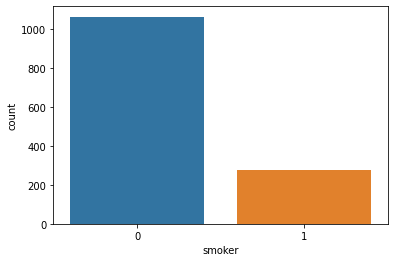

In [7]:
import seaborn as sns
sns.countplot(x='smoker',data=df)

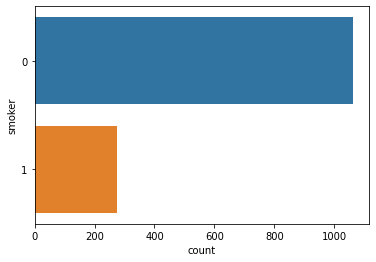

In [8]:
sns.countplot(y='smoker',data=df)

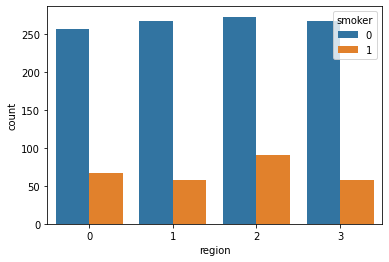

In [9]:
sns.countplot(x='region',data=df, hue='smoker')

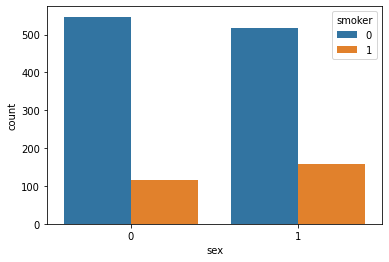

In [10]:
sns.countplot(x='sex',data=df, hue='smoker')

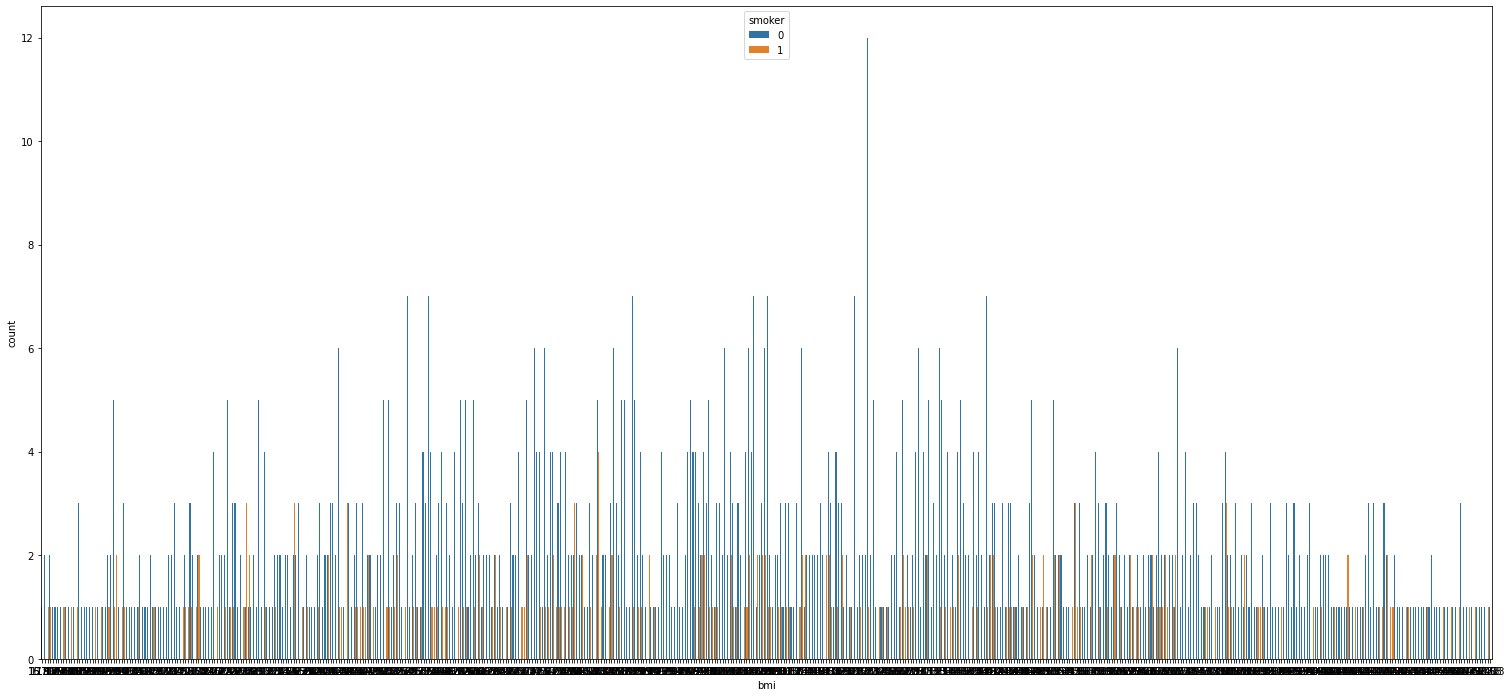

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,12))
sns.countplot(x='bmi',data=df, hue='smoker')

In [12]:
# define dependent & independent value
x = df.drop('smoker',axis=1)
y = df['smoker']

In [13]:
# split the dataset into train & test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [14]:
# import DecisionTreeClassifier & create an object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [15]:
clf.fit(xtrain,ytrain)  # fit the model

DecisionTreeClassifier()

In [16]:
xtrain.head() 

,region,age,sex,bmi,children
332,1,61,0,31.160,0
355,3,46,1,27.600,0
138,2,54,0,31.900,3
381,0,55,1,30.685,0
292,2,25,1,45.540,2


In [17]:
ytrain.head()

332    0
355    0
138    0
381    1
292    1
Name: smoker, dtype: int64

In [18]:
ytrain.value_counts()

0    741
1    195
Name: smoker, dtype: int64

In [19]:
195 / (741+195)

0.20833333333333334

In [20]:
testing = clf.predict(xtest)
testing # predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [21]:
import numpy as np
np.array(ytest) # actual result

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [22]:
clf.score(xtest, ytest)  # accuracy score of testing set

0.6766169154228856

In [23]:
# import classification_report , confusion_matrix, roc_curve, plot_roc_curve module
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, plot_roc_curve
# now we see classification_report of this model
classification_report(ytest , testing)

'              precision    recall  f1-score   support\n\n           0       0.81      0.78      0.79       323\n           1       0.22      0.25      0.24        79\n\n    accuracy                           0.68       402\n   macro avg       0.52      0.52      0.52       402\nweighted avg       0.69      0.68      0.68       402\n'

In [24]:
print(classification_report(ytest , testing))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       323
           1       0.22      0.25      0.24        79

    accuracy                           0.68       402
   macro avg       0.52      0.52      0.52       402
weighted avg       0.69      0.68      0.68       402



In [25]:
xtest.shape

(402, 5)

In [26]:
# confusion_matrix of this model
con_mat = confusion_matrix(ytest ,testing)
con_mat

array([[252,  71],
       [ 59,  20]])

In [27]:
(250+21) / (250+73+58+21)

0.6741293532338308

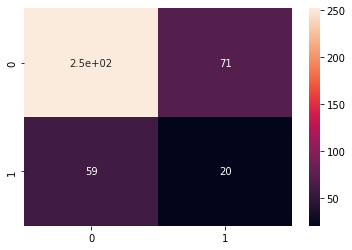

In [28]:
import seaborn as sns # import seaborn library
sns.heatmap(con_mat, annot=True)

In [29]:
# tp,fn,fp,tn value
tp,fn,fp,tn=confusion_matrix(ytest ,testing).reshape(-1)
print("Tp = ",tp)
print("Fn = ",fn)
print("Fp = ",fp)
print("Tn = ",tn)

Tp =  252
Fn =  71
Fp =  59
Tn =  20


In [30]:
# Accuracy 
accuracy = (tp + tn)/(tp + fp + tn + fn)
accuracy

0.6766169154228856

In [31]:
# Precision or Positive Predictive Value (PPV)
precision = tp/(tp + fp) 
precision

0.8102893890675241

In [32]:
# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
recall = tp / (tp + fn) 
recall

0.7801857585139319

In [33]:
# False Positive Rate (FPR) or 1-Specificity
fpr = fp / (fp + tn) 
fpr

0.7468354430379747

In [34]:
# F1 Measure 
f1_measure = (precision + recall) / 2 
f1_measure

0.795237573790728

In [35]:
# Harmonic Mean, F1 Score 
f1 = ( 2 * precision * recall) / (precision + recall) 
f1

0.7949526813880127

In [36]:
# Specificity, Selectivity or True Negative Rate (TNR) 
specificity = tn / (tn + fp)
specificity

0.25316455696202533

In [37]:
# Threat Score (TS) or Critical Success Index (CSI) 
csi = tp / (tp + fn + fp) 
csi

0.6596858638743456

In [38]:
# False Discovery Rate (FDR) 
fdr = fp / (tp + fp) 
fdr

0.18971061093247588

In [39]:
# balanced accuracy (BA) 
ba = (recall+specificity)/2
ba

0.5166751577379787

In [40]:
tpr = recall
tnr = specificity

In [41]:
# informedness or bookmaker informedness (BM) 
bm = tpr + tnr - 1
bm

0.03335031547595735

In [42]:
# Negative Predictive Value
npv = tn/(fn+tn)
npv

0.21978021978021978

In [43]:
ppv = precision

In [44]:
# markedness (MK) or deltaP (Ap) 
mk = ppv + npv - 1 
mk

0.0300696088477439

In [45]:
# Matthews correlation coefficient (MCC)
mcc = ((tp+tn)-(fp*fn)) / ((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2)
mcc

-0.14575983703216677

In [46]:
# Fowlkes-Mallows index (FM) 
fm = ((tp/(tp+fp))*(tp/(tp+fn)))**(1/2)
fm

0.795095114829312

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


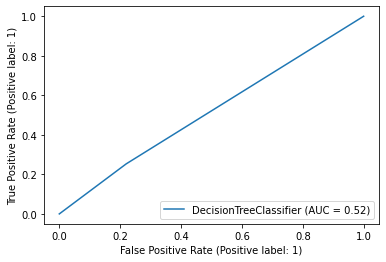

In [47]:
# ROC & AUC Curve
plot_roc_curve(clf,xtest,ytest)

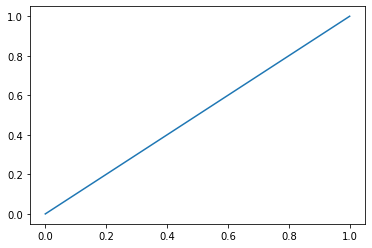

In [48]:
import matplotlib.pyplot as plt
#plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


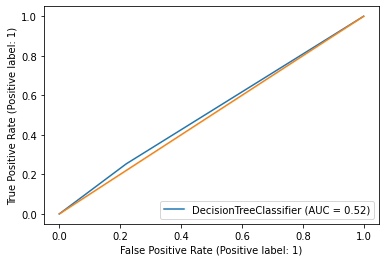

In [49]:
import matplotlib.pyplot as plt
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])